### Student Information
Name: 張騏麟

Student ID: 111034536

GitHub ID:  qilinchang70

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [ ]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [ ]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
#using "query" function to query the first ten data with filtering category=3
print(X[:10][['text','category']].query('(category==3)'))

#using boolean to query first ten data with category=1
print(X.loc[X['category']==1].head(n=10))

                                                text  category
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3
                                                 text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1  comp.graphics
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1  comp

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [ ]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [ ]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

I've noticed that the main difference is that the declaration of the missing_example values for each 'id' is different. Although they may all appear to be missing values, in reality, the 'id' C&D&F contains strings, which is why they are not recognized as missing values.

In [ ]:
#evidence
data_type_of_C = NA_df.loc[2, 'missing_example']
print(type(data_type_of_C))
data_type_of_D = NA_df.loc[3, 'missing_example']
print(type(data_type_of_D))
data_type_of_F = NA_df.loc[5, 'missing_example']
print(type(data_type_of_F))

<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [ ]:
print(X.shape)
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)

(2257, 3)


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

1. Without setting random_state, the index of X_sample are almost different every time.

2. The distribution of X_sample is different from X, as evident from the maximum and minimum values, median, mean, and standard deviation.

In [ ]:
#Evidence
import matplotlib.pyplot as plt
import statistics as st

# Comparing using descriptive statistics
# For X :
max_value = max(X['category'])
min_value = min(X['category'])
mean_value = st.mean(X['category'])
median_value = st.median(X['category'])
std_value = st.stdev(X['category'])
formatted_result = f'max: {max_value:.2f}, min: {min_value:.2f}, mean: {mean_value:.10f}, median: {median_value:.2f}, std: {std_value:.10f}'
print(formatted_result)

# For X sample :
X_sample = X.sample(n=1000,random_state=42) 
max_value = max(X_sample['category'])
min_value = min(X_sample['category'])
mean_value = st.mean(X_sample['category'])
median_value = st.median(X_sample['category'])
std_value = st.stdev(X_sample['category'])

# Result 
formatted_result = f'max: {max_value:.2f}, min: {min_value:.2f}, mean: {mean_value:.10f}, median: {median_value:.2f}, std: {std_value:.10f}'
print(formatted_result)

max: 3.00, min: 0.00, mean: 1.5813026141, median: 2.00, std: 1.0954716127
max: 3.00, min: 0.00, mean: 1.6110000000, median: 2.00, std: 1.0912698428


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
----------------------------------------
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


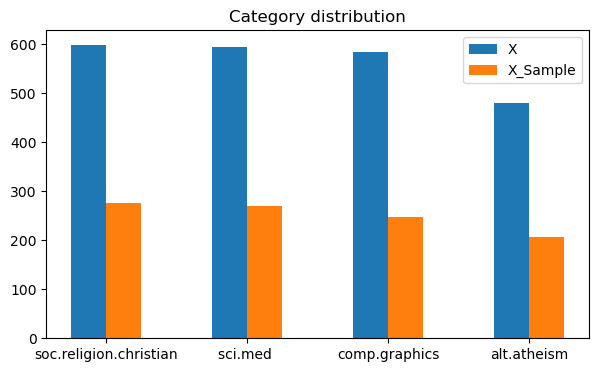

In [ ]:
print(X.category_name.value_counts())
print("-"*40)
print(X_sample.category_name.value_counts())

height_X = X.category_name.value_counts()
height_X_sample = X_sample.category_name.value_counts()
pos = np.arange(len(categories))

# Plot
plt.figure(figsize=(7,4))
plt.title('Category distribution')

plt.bar(pos, height_X , width=0.25, label='X')
plt.bar(pos+0.25, height_X_sample, width=0.25, label='X_Sample')

plt.legend(loc='best')
plt.xticks(pos+ 0.25/2, ('soc.religion.christian', 'sci.med ', 'comp.graphics','alt.atheism'))

plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
'''
LookupError: 
**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
'''
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
print(X_counts[0])

(2257, 35788)
  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [ ]:
X_counts[0:5, 0:100].toarray()
print(X_counts[0:5, 0:100].toarray())
count_vect.get_feature_names_out()[0:1]

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

array(['00'], dtype=object)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [ ]:
import seaborn as sb

for i in range(1,len(X_counts.toarray())):
    if(X_counts[4,i] == 1):
            one = i
            break

print('The other "1" represents : ',count_vect.get_feature_names_out()[one])



The other "1" represents :  01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [ ]:
# Answer here
data = np.asarray(X_counts.sum(axis=0))[0]

# 取詞頻前0.1%的詞
data_eli = np.percentile(data, 99.9)
print(data_eli) 

term_eli=np.asarray(X_counts.sum(axis=0))[0]>2197

lst=[]
for i in enumerate(term_eli):
    if i[1]!=False:
        lst.append(i[0])
print(lst)

word=[]
for i in lst:
    word.append(count_vect.get_feature_names_out()[i])
            
print(word)


2197.8990000000776
[4938, 4992, 5410, 5549, 6298, 7480, 7505, 7766, 12626, 14601, 14887, 15521, 16254, 16302, 17268, 17556, 18474, 18551, 20253, 23250, 23610, 23733, 23741, 23870, 31077, 32139, 32142, 32202, 32233, 32270, 32493, 34703, 34775, 34923, 35157, 35638]
['an', 'and', 'are', 'as', 'be', 'but', 'by', 'can', 'edu', 'for', 'from', 'god', 'have', 'he', 'if', 'in', 'is', 'it', 'lines', 'not', 'of', 'on', 'one', 'or', 'subject', 'that', 'the', 'there', 'they', 'this', 'to', 'was', 'we', 'what', 'with', 'you']


In [ ]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[lst]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
print(plot_y)
plot_z = X_counts[0:50, lst].toarray()
print(plot_z)

['term_an', 'term_and', 'term_are', 'term_as', 'term_be', 'term_but', 'term_by', 'term_can', 'term_edu', 'term_for', 'term_from', 'term_god', 'term_have', 'term_he', 'term_if', 'term_in', 'term_is', 'term_it', 'term_lines', 'term_not', 'term_of', 'term_on', 'term_one', 'term_or', 'term_subject', 'term_that', 'term_the', 'term_there', 'term_they', 'term_this', 'term_to', 'term_was', 'term_we', 'term_what', 'term_with', 'term_you']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39', 'doc_40', 'doc_41', 'doc_42', 'doc_43', 'doc_44', 'doc_45', 'doc_46', 'doc_47', 'doc_48', 'doc_49']
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 2  9  6 ...  2  7 13]


,term_an,term_and,term_are,term_as,term_be,term_but,term_by,term_can,term_edu,term_for,...,term_the,term_there,term_they,term_this,term_to,term_was,term_we,term_what,term_with,term_you
doc_0,0,0,0,0,0,0,0,0,0,0,...,5,0,0,1,4,0,1,0,0,0
doc_1,0,0,0,1,4,0,1,2,1,2,...,11,1,0,3,4,0,0,0,0,0
doc_2,2,9,6,0,8,1,0,4,2,6,...,14,1,9,14,26,3,3,2,7,13
doc_3,0,1,0,0,0,0,0,1,0,1,...,6,0,0,1,0,0,0,0,0,0
doc_4,0,3,2,2,0,0,0,0,2,2,...,10,1,0,2,8,0,0,0,0,1
doc_5,0,7,3,3,12,0,1,0,2,0,...,12,0,5,2,14,0,0,1,0,0
doc_6,0,7,5,4,3,1,0,2,2,5,...,3,0,1,0,8,0,4,0,2,0
doc_7,3,9,3,4,5,4,0,1,0,1,...,21,1,1,2,11,3,1,0,5,0
doc_8,0,5,3,0,0,1,0,0,6,0,...,6,2,0,1,6,0,0,1,0,1
doc_9,1,23,0,3,1,3,0,0,2,3,...,10,2,0,7,21,16,0,4,9,5


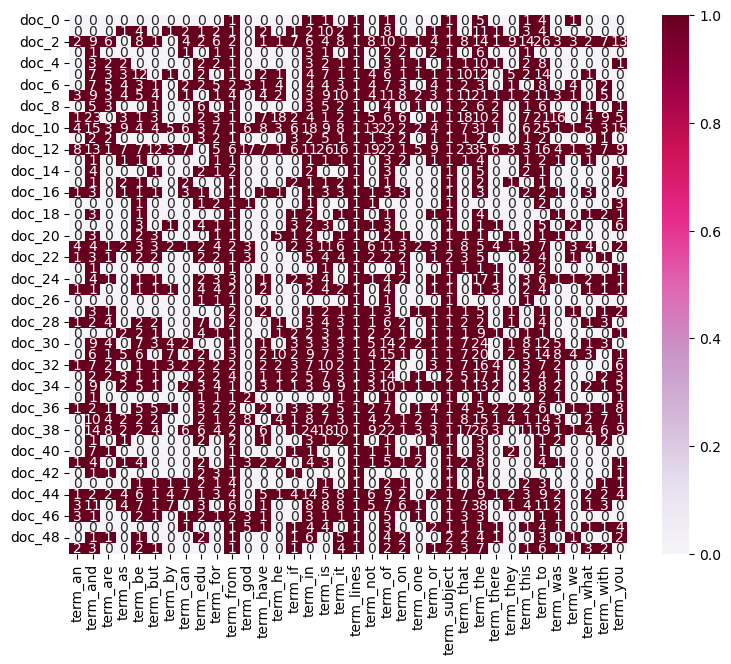

In [ ]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sb.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

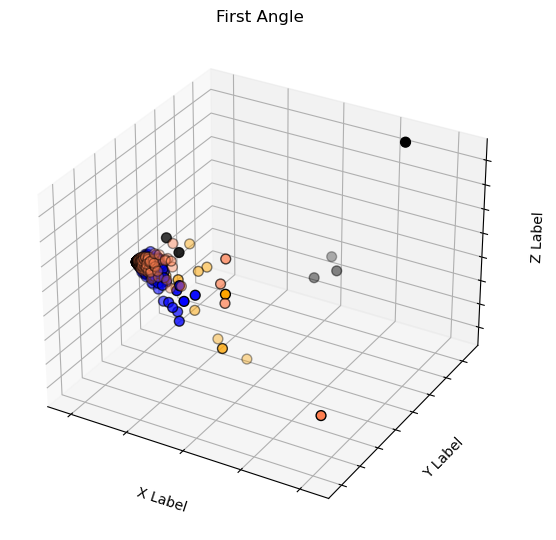

In [ ]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(7, 5))
ax = Axes3D(fig,auto_add_to_figure = False )
fig.add_axes(ax)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']
for c, category in zip(col, categories):
    ax1 = X_reduced[X['category_name'] == category].T[0]
    ax2 = X_reduced[X['category_name'] == category].T[1]
    ax3 = X_reduced[X['category_name'] == category].T[2] 
    ax.scatter(ax1, ax2, ax3, c=c, cmap=plt.cm.Set1, edgecolor='black', s=50)

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.title("First Angle")
plt.show()

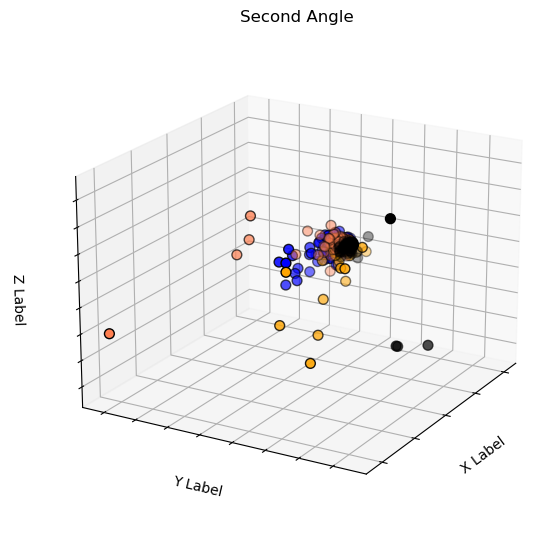

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(7, 5))
ax = Axes3D(fig,auto_add_to_figure = False )
fig.add_axes(ax)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']
for c, category in zip(col, categories):
    ax1 = X_reduced[X['category_name'] == category].T[0]
    ax2 = X_reduced[X['category_name'] == category].T[1]
    ax3 = X_reduced[X['category_name'] == category].T[2] 
    ax.scatter(ax1, ax2, ax3, c=c, cmap=plt.cm.Set1, edgecolor='black', s=50)

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.view_init(elev=20, azim=30)
plt.title("Second Angle")
plt.show()


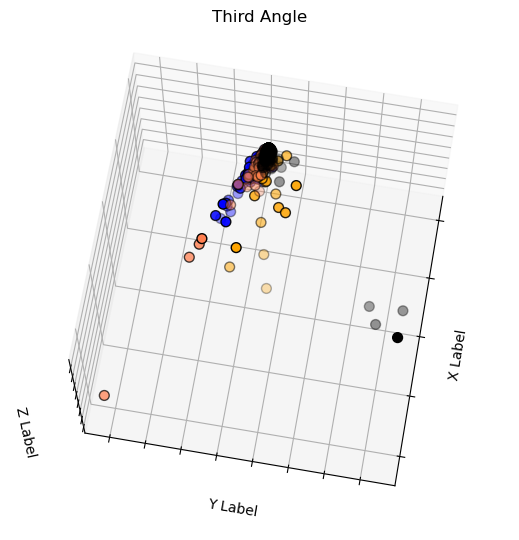

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(7, 5))
ax = Axes3D(fig,auto_add_to_figure = False )
fig.add_axes(ax)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'orange']
for c, category in zip(col, categories):
    ax1 = X_reduced[X['category_name'] == category].T[0]
    ax2 = X_reduced[X['category_name'] == category].T[1]
    ax3 = X_reduced[X['category_name'] == category].T[2] 
    ax.scatter(ax1, ax2, ax3, c=c, cmap=plt.cm.Set1, edgecolor='black', s=50)

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.view_init(elev=70, azim=10)
plt.title("Third Angle")
plt.show()


In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies.size

35788

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots()
fig.add_trace(
    go.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300], marker_color='blue'),
)

fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="bottom",
        xanchor="right",
    ),
    height=500,
    width=800,
    title_text="Interactive graph of Word Frequency",
    title_font_size=20,
    plot_bgcolor="white",
    xaxis_title="Words",
    yaxis_title="Frequency",
    xaxis=dict(title_font=dict(size=12)),
    yaxis=dict(title_font=dict(size=12)),
    font=dict(size=12),
    margin=dict(l=20, r=20, t=100, b=20),
)

fig.show()


### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


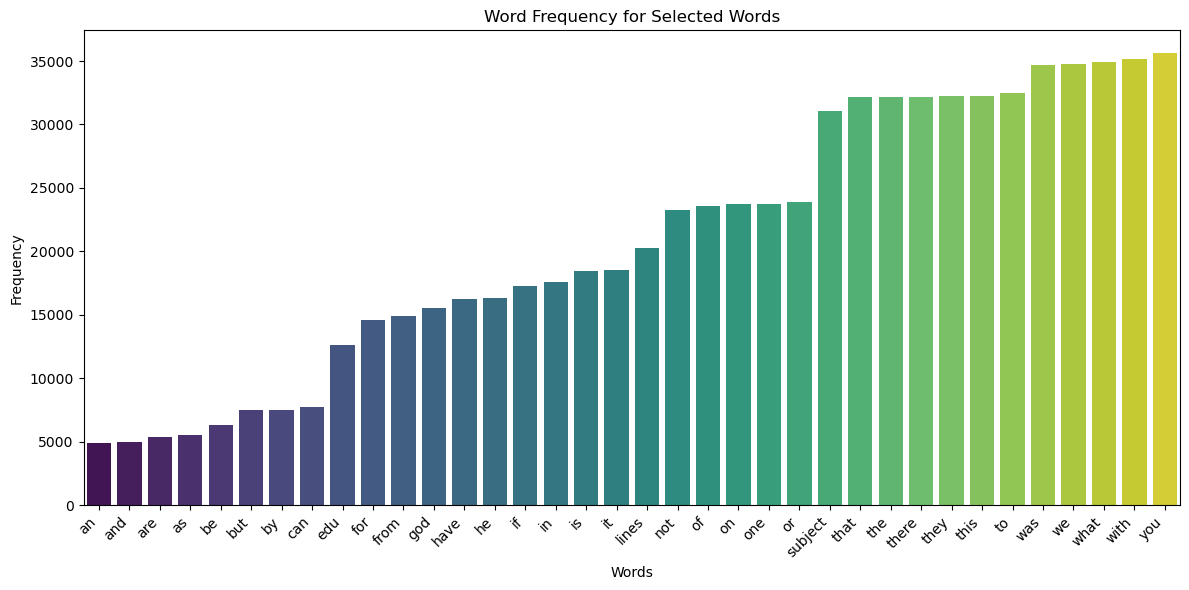

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

term_eli = np.asarray(X_counts.sum(axis=0))[0] > 2197
selected_indices = [i for i, el in enumerate(term_eli) if el]
selected_words = [count_vect.get_feature_names_out()[i] for i in selected_indices]

plt.figure(figsize=(12, 6))

g = sb.barplot(x=selected_words, y=selected_indices, palette="viridis") 

g.set_xticklabels(selected_words, rotation=45, horizontalalignment='right')

plt.title("Word Frequency for Selected Words")
plt.xlabel("Words")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

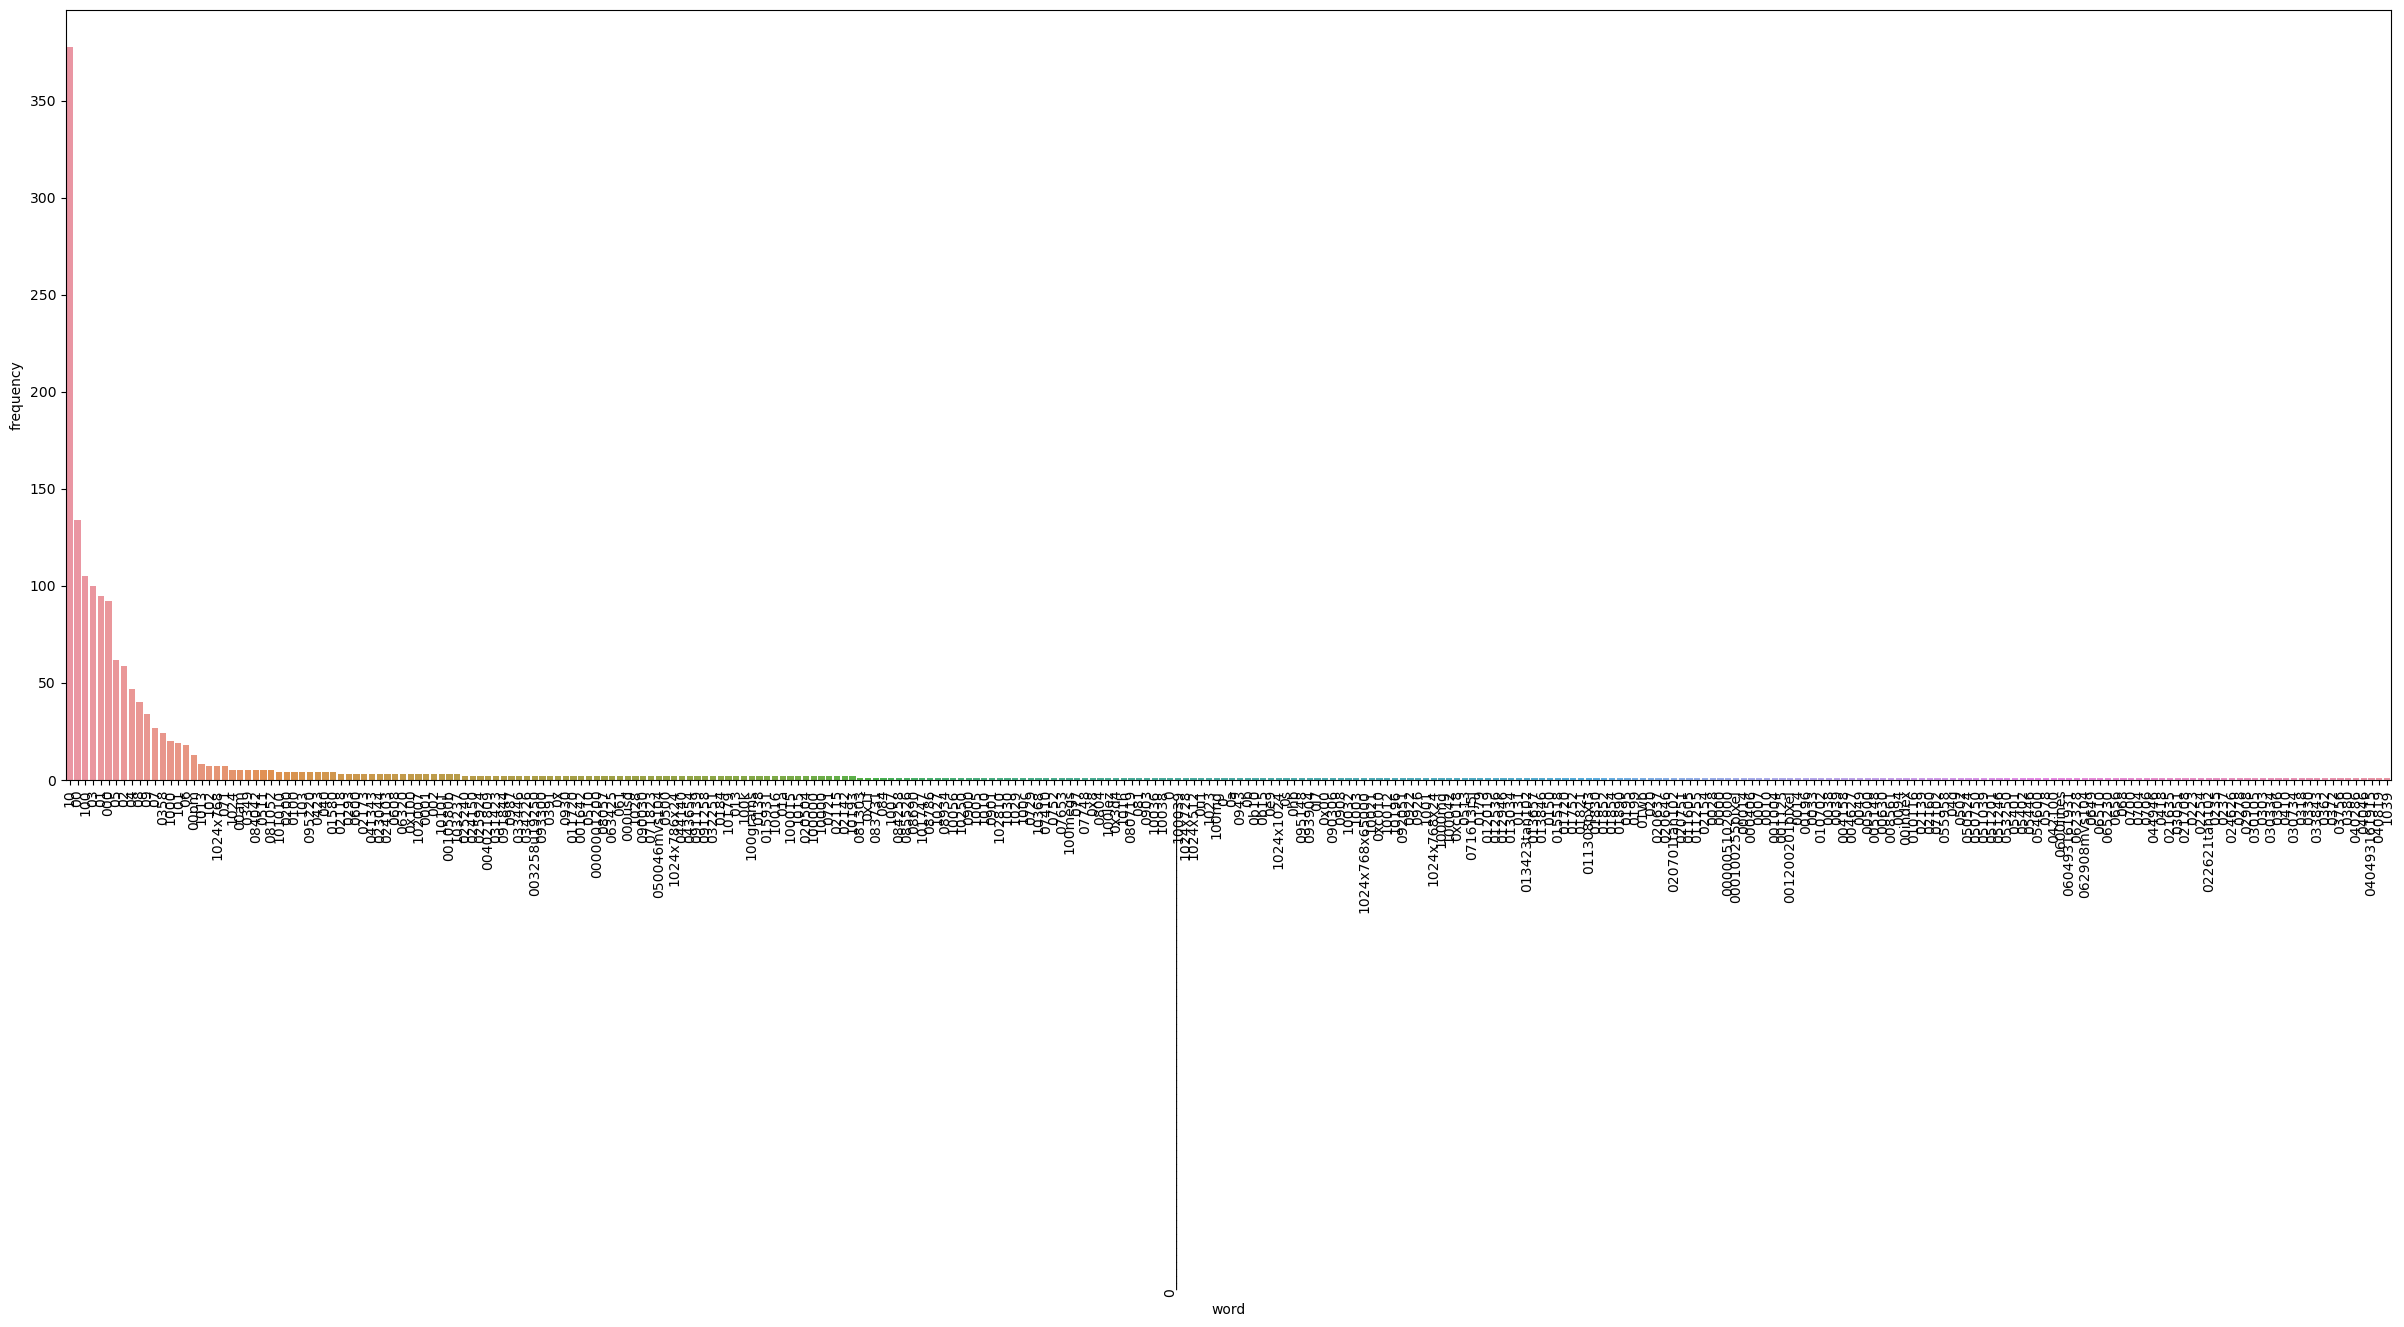

In [ ]:
# Answer here
df= pd.DataFrame({'word':count_vect.get_feature_names_out()[:300],'frequency':term_frequencies[:300]})
df.sort_values(ascending=False,by='frequency',inplace=True)

plt.subplots(figsize=(30, 10))
g = sb.barplot(x=df['word'], y=df['frequency'])
g.set_xticklabels(df['word'], rotation = 90)
plt.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

Ans : Obviously,it doesn't work.

In [ ]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 0, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 0, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 0]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 0]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 0]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 0]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 0]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 0, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 0, 0]"


## >>> **Second Part**


#### >>> **Data Preparation**


In [ ]:
data_amazon= pd.read_table(r'.\sentiment labelled sentences\amazon_cells_labelled.txt')
data_imdb= pd.read_table(r'.\sentiment labelled sentences\imdb_labelled.txt')
data_yelp= pd.read_table(r'.\sentiment labelled sentences\yelp_labelled.txt')

print(data_amazon.head())
print(data_imdb.head())
print(data_yelp.head())

  So there is no way for me to plug it in here in the US unless I go by a converter.  \
0                        Good case, Excellent value.                                   
1                             Great for the jawbone.                                   
2  Tied to charger for conversations lasting more...                                   
3                                  The mic is great.                                   
4  I have to jiggle the plug to get it to line up...                                   

   0  
0  1  
1  1  
2  0  
3  1  
4  0  
  A very, very, very slow-moving, aimless movie about a distressed, drifting young man.    \
0  Not sure who was more lost - the flat characte...                                        
1  Attempting artiness with black & white and cle...                                        
2       Very little music or anything to speak of.                                          
3  The best scene in the movie was when Gerardo i...     

In [ ]:
data_amazon.columns = data_imdb.columns = data_yelp.columns = ["sentence", "label"]
data_amazon.head()

,sentence,label
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [ ]:
print(len(data_amazon),len(data_imdb),len(data_yelp))

#Concate three datasets 
df=pd.concat([data_amazon,data_imdb,data_yelp],axis=0,ignore_index=True)
print(df.shape)
df

999 747 999
(2745, 2)


,sentence,label
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
...,...,...
2740,I think food should have flavor and texture an...,0
2741,Appetite instantly gone.,0
2742,Overall I was not impressed and would not go b...,0
2743,"The whole experience was underwhelming, and I ...",0


#### >>> **Check Missing Value**


In [ ]:
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,label
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


#### >>> **Check duplicated data**


In [ ]:
print(sum(df.duplicated()))

df[df.duplicated('sentence')]

17


,sentence,label
284,Great phone!.,1
406,Works great.,1
523,Works great!.,1
542,Don't buy this product.,0
743,If you like a loud buzzing to override all you...,0
747,Does not fit.,0
777,This is a great deal.,1
791,Great Phone.,1
891,Excellent product for the price.,1
895,Great phone.,1


In [ ]:
df.drop_duplicates(inplace=True)
print(len(df))

2728


#### >>> **Sampling**


In [ ]:
print(df.shape)
df_sample = df.sample(n=1000,random_state=42) #random state
display(df_sample)

(2728, 2)


,sentence,label
1008,And those baby owls were adorable.,1
2741,Appetite instantly gone.,0
2055,Fantastic food!,1
951,Very satisifed with that.,1
73,This is a beautiful phone.,1
...,...,...
2557,"This place is overpriced, not consistent with ...",0
2652,The chips and sals a here is amazing!!!!!!!!!!...,1
1778,seems like a good quick place to grab a bite o...,0
1917,The waitresses are very friendly.,1


#### >>> **Visualization**


1    1375
0    1353
Name: label, dtype: int64


<AxesSubplot:title={'center':'Label distribution'}>

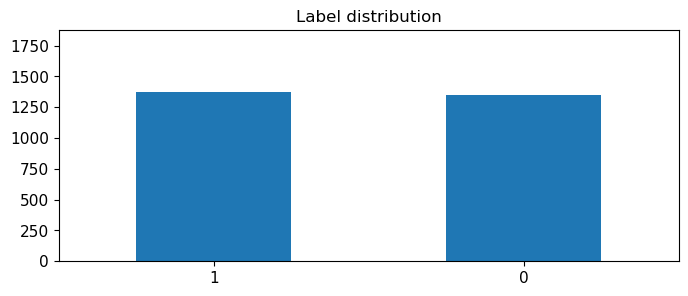

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(df.label.value_counts())

upper_bound = max(df.label.value_counts() + 500) 
df.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

0    517
1    483
Name: label, dtype: int64


<AxesSubplot:title={'center':'Label distribution (Sampling)'}>

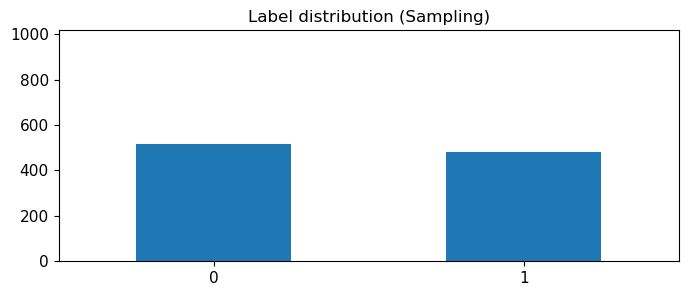

In [ ]:
print(df_sample.label.value_counts())

upper_bound = max(df_sample.label.value_counts() + 500) 
df_sample.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution (Sampling)',
                                    ylim = [0, upper_bound],     
                                    rot = 0, fontsize = 11, figsize = (8,3))

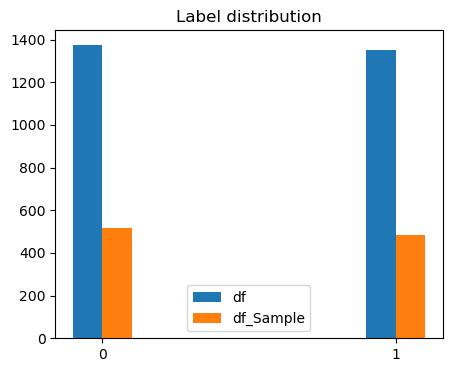

In [ ]:
# Answer here

# Bar Chart for label in df and df_sample
 
height_df= df.label.value_counts()
height_df_sample= df_sample.label.value_counts()
pos=np.arange(2)

plt.figure(figsize=(5,4))
plt.title('Label distribution')

plt.bar(pos, height_df , width=0.1, label='df')
plt.bar(pos+0.1, height_df_sample, width=0.1, label='df_Sample')

plt.legend(loc='best')
plt.xticks(pos+ 0.1/2, ('0','1'))

plt.show()

#### >>> **Feature Creation**


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df[0:4]

,sentence,label,unigrams
0,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
1,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
2,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
3,The mic is great.,1,"[The, mic, is, great, .]"


In [ ]:
list(df[0:1]['unigrams'])

[['Good', 'case', ',', 'Excellent', 'value', '.']]

#### >>> **Feature Subset Selection**


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence) 
print(df_counts.shape)
print(df_counts[0])
print(count_vect.get_feature_names_out()[78])

(2728, 5151)
  (0, 1989)	1
  (0, 712)	1
  (0, 1599)	1
  (0, 4857)	1
absolute


In [ ]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [ ]:
count_vect.get_feature_names_out()[0:100]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17',
       '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973',
       '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005',
       '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30',
       '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44',
       '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb',
       '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85',
       '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned',
       'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad',
       'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse',
       'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable',
       'access', 'accessable', 'accessible', 'accessing', 'accessory',
       'accessoryone', 'accident', 'accidentally', 'acclaimed',
       'accolades', 'accommodations'], dtype=object)

In [ ]:
data = np.asarray(df_counts.sum(axis=0))[0]

# 取詞頻前0.5%的詞
data_eli = np.percentile(data, 99.5)
print(data_eli) 

term_eli=np.asarray(df_counts.sum(axis=0))[0]>164

lst=[]
for i in enumerate(term_eli):
    if i[1]!=False:
        lst.append(i[0])
print(lst)

word=[]
for i in lst:
    word.append(count_vect.get_feature_names_out()[i])
            
print(word)

163.25
[215, 272, 296, 636, 1825, 1989, 2019, 2109, 2310, 2423, 2428, 2950, 2978, 3059, 3093, 3118, 4157, 4525, 4527, 4554, 4605, 4886, 4964, 5065, 5134]
['and', 'are', 'as', 'but', 'for', 'good', 'great', 'have', 'in', 'is', 'it', 'movie', 'my', 'not', 'of', 'on', 'so', 'that', 'the', 'this', 'to', 'very', 'was', 'with', 'you']


In [ ]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[lst]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
print(plot_y)
plot_z = df_counts[0:50, lst].toarray() #df_counts[how many documents, how many terms]
print(plot_z)

['term_and', 'term_are', 'term_as', 'term_but', 'term_for', 'term_good', 'term_great', 'term_have', 'term_in', 'term_is', 'term_it', 'term_movie', 'term_my', 'term_not', 'term_of', 'term_on', 'term_so', 'term_that', 'term_the', 'term_this', 'term_to', 'term_very', 'term_was', 'term_with', 'term_you']
['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34', 'doc_35', 'doc_36', 'doc_37', 'doc_38', 'doc_39', 'doc_40', 'doc_41', 'doc_42', 'doc_43', 'doc_44', 'doc_45', 'doc_46', 'doc_47', 'doc_48', 'doc_49']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]


,term_and,term_are,term_as,term_but,term_for,term_good,term_great,term_have,term_in,term_is,...,term_on,term_so,term_that,term_the,term_this,term_to,term_very,term_was,term_with,term_you
doc_0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
doc_2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
doc_4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,4,0,0,0,0
doc_5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
doc_6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2
doc_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
doc_8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doc_9,1,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


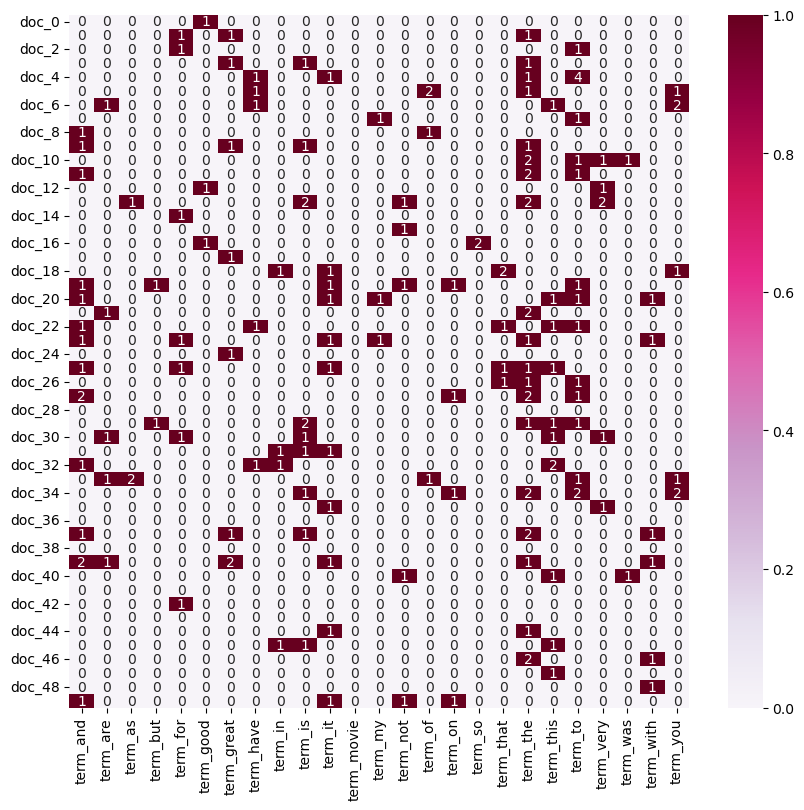

In [ ]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(10, 9))
ax = sb.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### >>> **Dimensionality Reduction**


In [ ]:
from sklearn.decomposition import PCA

print(df_counts.shape)
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2728, 5151)
(2728, 2)


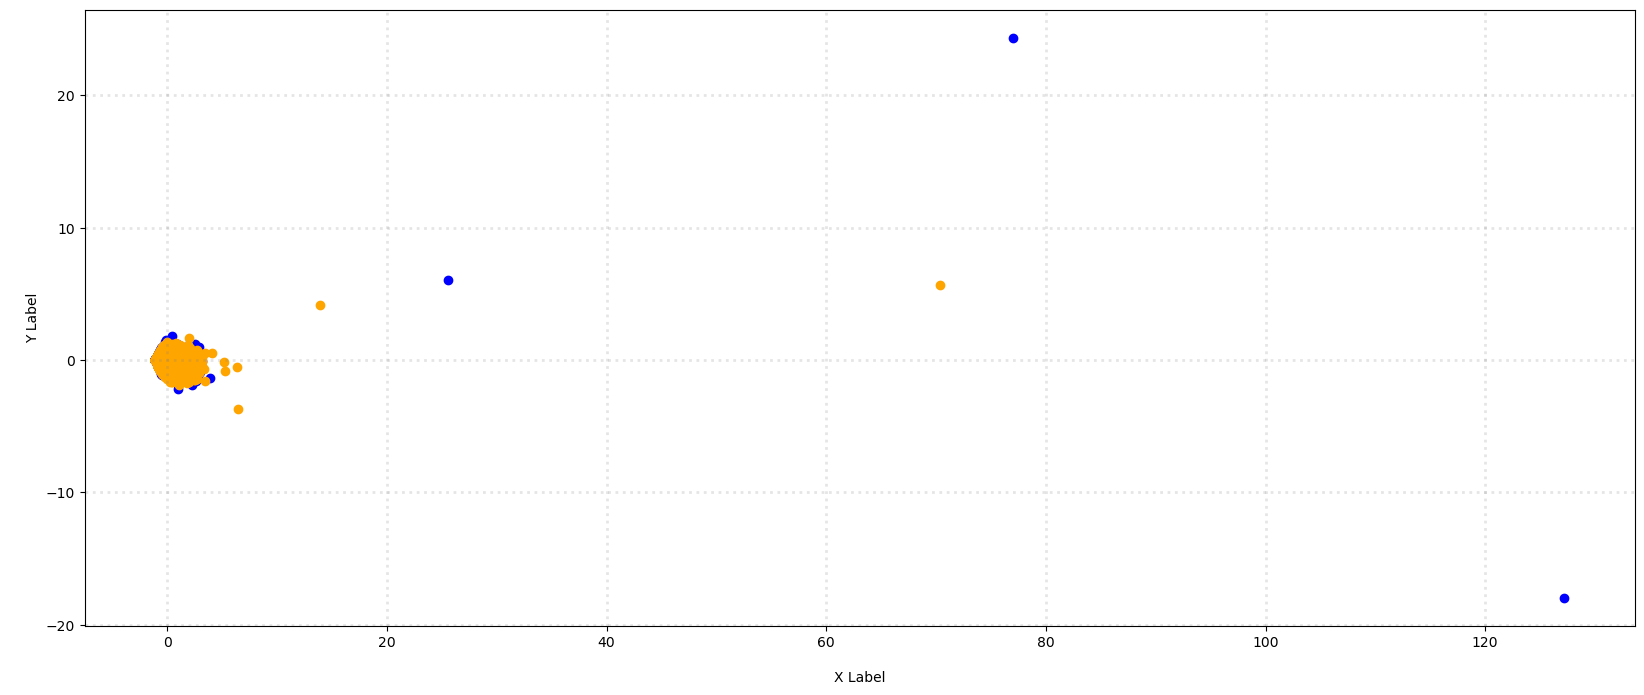

In [ ]:
## 2D Diagram ##

col = ['blue', 'orange']
labels=[0,1]

fig = plt.figure(figsize = (20,8))
ax = fig.subplots()

for c, label in zip(col, labels):
    ax1 = df_reduced[df['label'] == label].T[0]
    ax2 = df_reduced[df['label'] == label].T[1]
   
    ax.scatter(ax1, ax2, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [ ]:
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2728, 3)


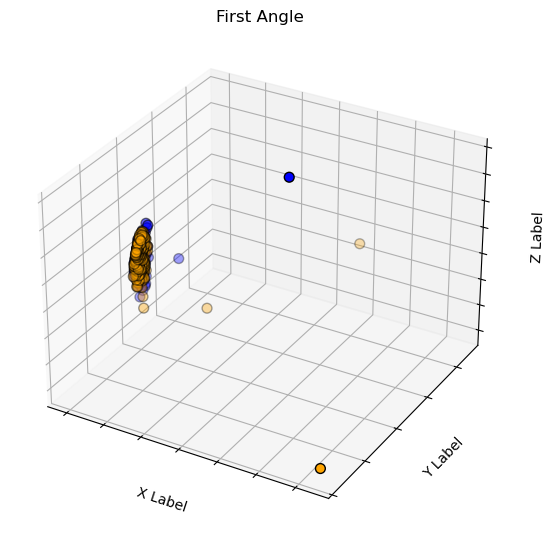

In [ ]:
## 3D Diagram (First Angle) ##

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(7, 5))
ax = Axes3D(fig,auto_add_to_figure = False )
fig.add_axes(ax)

col = ['orange', 'blue']

for c, label in zip(col, labels):
    ax1 = df_reduced[df['label'] == label].T[0]
    ax2 = df_reduced[df['label'] == label].T[1]
    ax3 = df_reduced[df['label'] == label].T[2] 
    ax.scatter(ax1, ax2, ax3, c=c, cmap=plt.cm.Set1, edgecolor='black', s=50)

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.title("First Angle")
plt.show()


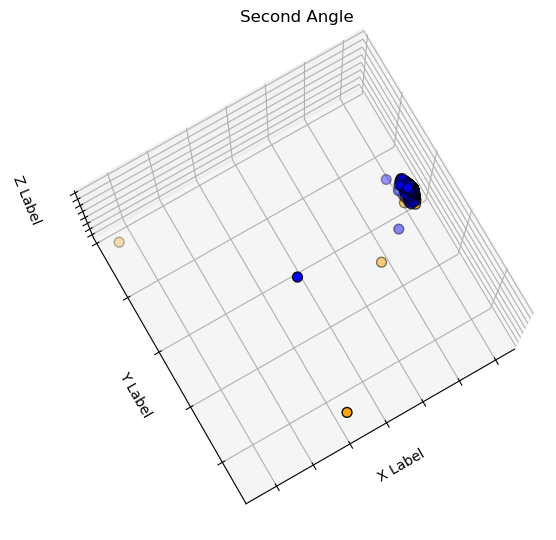

In [ ]:
## 3D Diagram (Second Angle) ##

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(7, 5))
ax = Axes3D(fig,auto_add_to_figure = False )
fig.add_axes(ax)

col = ['orange', 'blue']

for c, label in zip(col, labels):
    ax1 = df_reduced[df['label'] == label].T[0]
    ax2 = df_reduced[df['label'] == label].T[1]
    ax3 = df_reduced[df['label'] == label].T[2] 
    ax.scatter(ax1, ax2, ax3, c=c, cmap=plt.cm.Set1, edgecolor='black', s=50)

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.view_init(elev=80, azim=60)
plt.title("Second Angle")
plt.show()

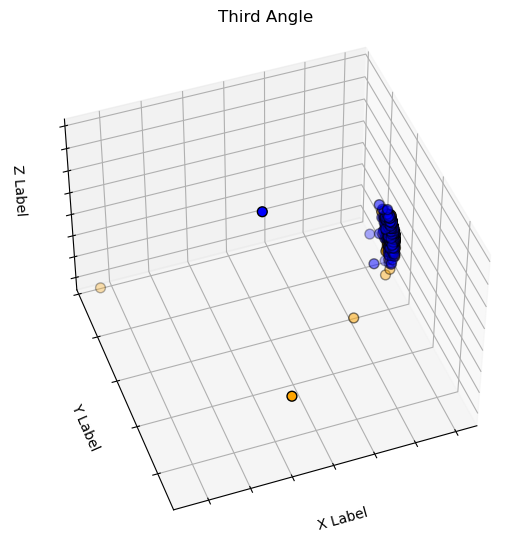

In [ ]:
## 3D Diagram (Third Angle) ##

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(7, 5))
ax = Axes3D(fig,auto_add_to_figure = False )
fig.add_axes(ax)

col = ['orange', 'blue',]

for c, label in zip(col, labels):
    ax1 = df_reduced[df['label'] == label].T[0]
    ax2 = df_reduced[df['label'] == label].T[1]
    ax3 = df_reduced[df['label'] == label].T[2] 
    ax.scatter(ax1, ax2, ax3, c=c, cmap=plt.cm.Set1, edgecolor='black', s=50)

ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.view_init(elev=45, azim=70)
plt.title("Third Angle")
plt.show()

#### >>> **Attribute Transformation / Aggregation**


In [ ]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0:100]

array([ 1, 36,  3,  2,  4,  3,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  9,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,
        7,  1,  1,  3,  1,  1,  1,  5,  1,  1,  1,  2,  1,  1,  4,  1,  3,
        1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,  7,  1,
        1,  1,  1,  1,  5,  4,  1, 84,  7,  1,  1,  1, 21,  1,  1,  2,  1,
        1,  1,  2,  1,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1],
      dtype=int64)

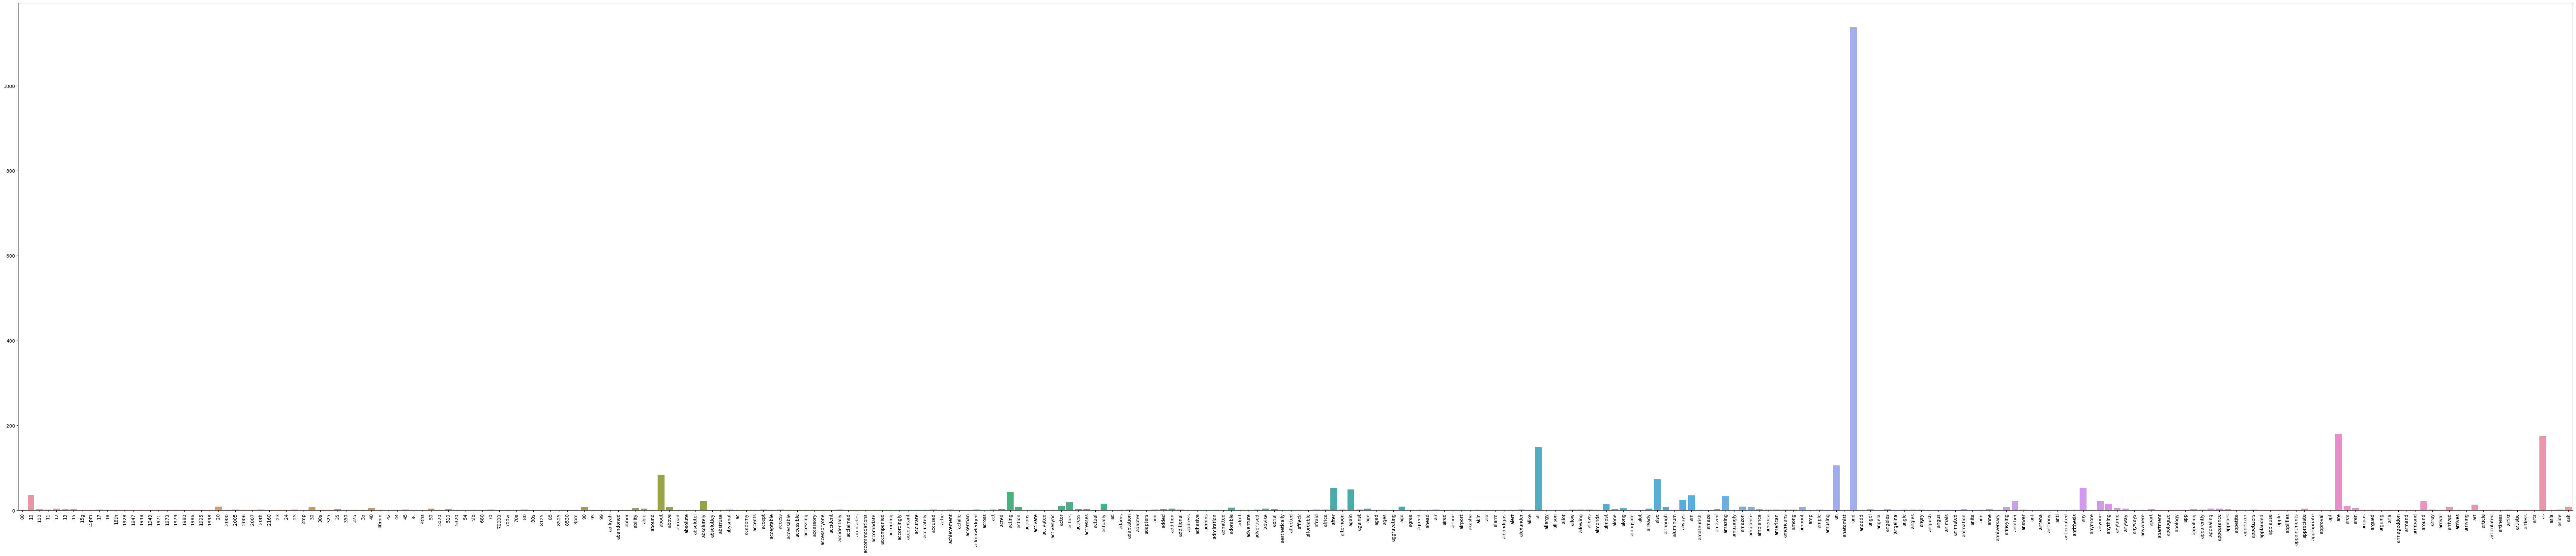

In [ ]:
plt.subplots(figsize=(100, 20))
g = sb.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

plt.show()

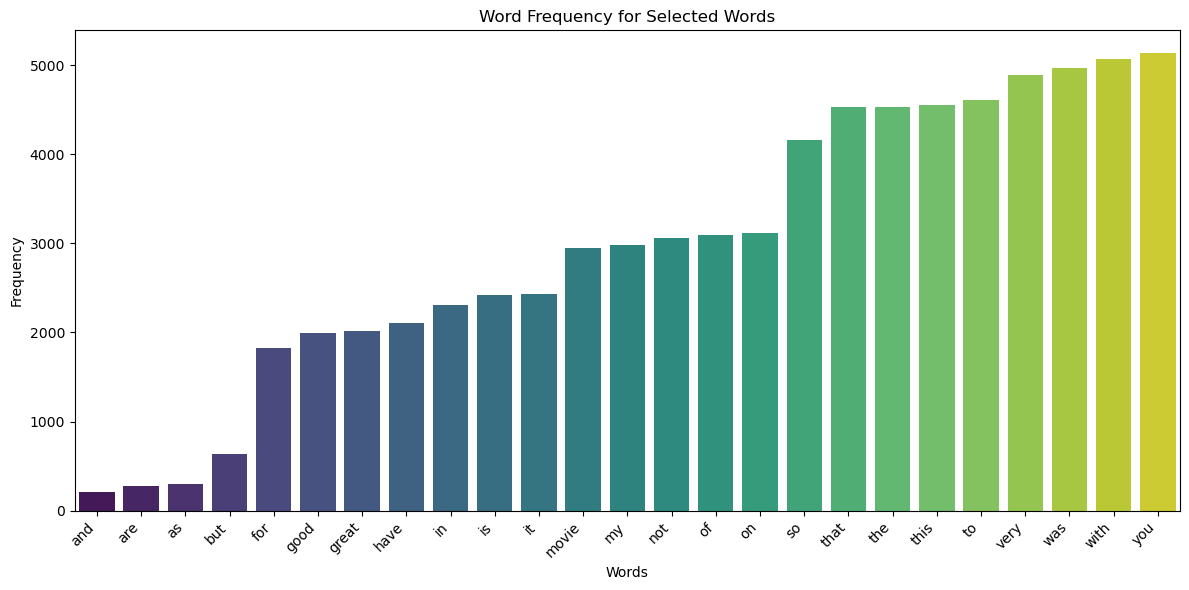

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


plt.figure(figsize=(12, 6))
g = sb.barplot(x=word, y=lst, palette="viridis") 

g.set_xticklabels(word, rotation=45, horizontalalignment='right')

plt.title("Word Frequency for Selected Words")
plt.xlabel("Words")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


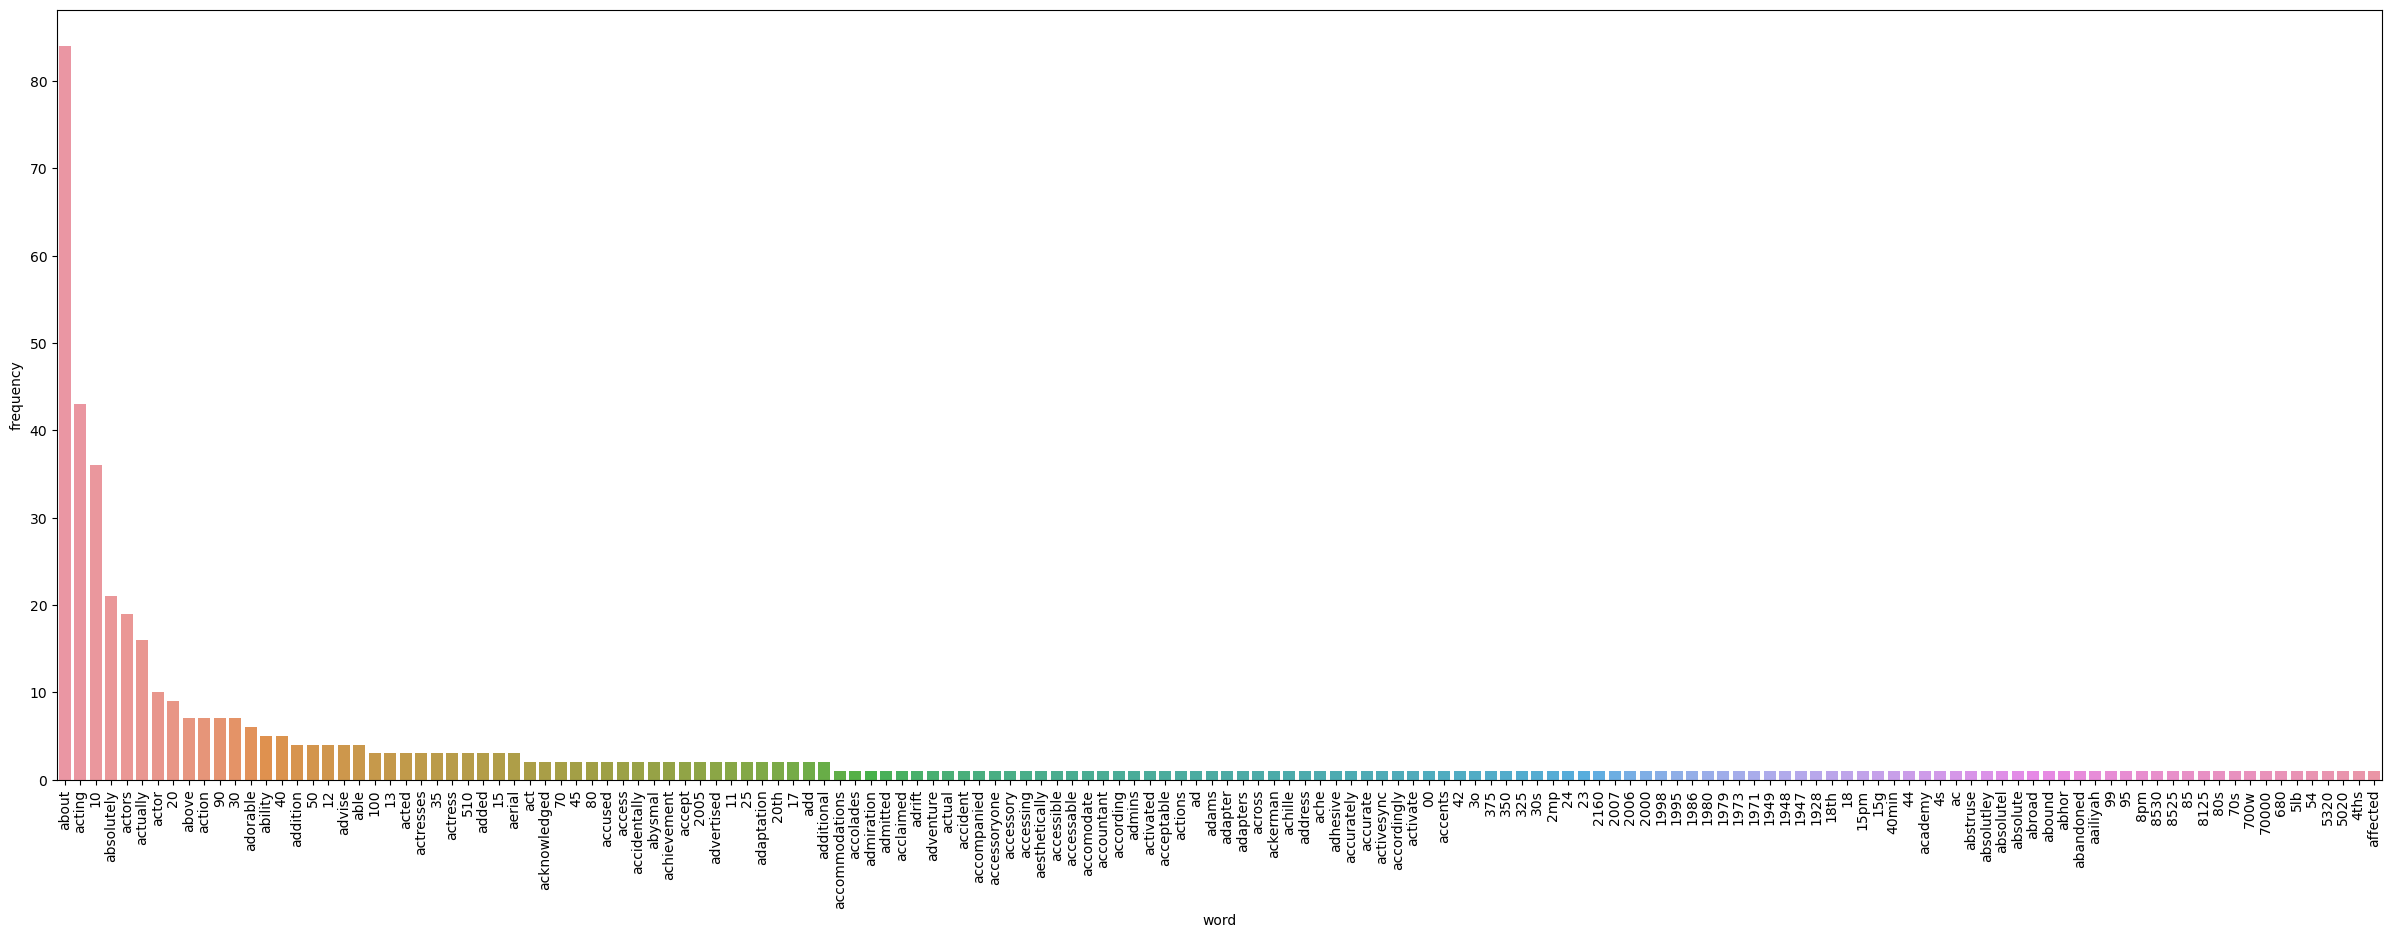

In [ ]:
# Answer here
df_new= pd.DataFrame({'word':count_vect.get_feature_names_out()[:150],'frequency':term_frequencies[:150]})
df_new.sort_values(ascending=False,by='frequency',inplace=True)

plt.subplots(figsize=(30, 10))
g = sb.barplot(x=df_new['word'], y=df_new['frequency'])
g.set_xticklabels(df_new['word'], rotation = 90)
plt.show()

## >>> **Third Part**


#### >>> **New data visualizations**


In [ ]:
data_amazon= pd.read_table(r'.\sentiment labelled sentences\amazon_cells_labelled.txt')
data_imdb= pd.read_table(r'.\sentiment labelled sentences\imdb_labelled.txt')
data_yelp= pd.read_table(r'.\sentiment labelled sentences\yelp_labelled.txt')

In [ ]:
data_amazon.columns = data_imdb.columns = data_yelp.columns = ["sentence", "label"]
data_amazon.head()

,sentence,label
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [ ]:
count_vect = CountVectorizer()
data_amazon_counts = count_vect.fit_transform(data_amazon.sentence) 

#計算 Amazon 資料集詞頻前0.5%的data
amazon_ct = np.asarray(data_amazon_counts.sum(axis=0))[0]
amazon_ct_eli = np.percentile(amazon_ct, 99.5)
print(amazon_ct_eli) 

119.32500000000027


In [ ]:
#挑選 Amazon 資料集詞頻前0.5%的data

amazon_ct_eli=np.asarray(data_amazon_counts.sum(axis=0))[0]>120

lst=[]
for i in enumerate(amazon_ct_eli):
    if i[1]!=False:
        lst.append(i[0])
print(lst)
word=[]
for i in lst:
    word.append(count_vect.get_feature_names_out()[i])
            
print(word)

[91, 853, 856, 1051, 1184, 1603, 1617, 1639]
['and', 'is', 'it', 'my', 'phone', 'the', 'this', 'to']


In [ ]:
count_vect_imdb = CountVectorizer()
data_imdb_counts = count_vect_imdb.fit_transform(data_imdb.sentence) 


#計算 imdb 資料集詞頻前0.5%的data
imdb_ct = np.asarray(data_imdb_counts.sum(axis=0))[0]
imdb_ct_eli = np.percentile(imdb_ct, 99.5)
print(imdb_ct_eli) 

88.92499999999927


In [ ]:
#挑選 imdb 資料集詞頻前0.5%的data

imdb_ct_eli=np.asarray(data_imdb_counts.sum(axis=0))[0]>89
lst_imdb=[]

for i in enumerate(imdb_ct_eli):
    if i[1]!=False:
        lst_imdb.append(i[0])
print(lst_imdb)
word_imdb=[]
for i in lst_imdb:
    word_imdb.append(count_vect_imdb.get_feature_names_out()[i])
            
print(word_imdb)

[124, 173, 364, 1005, 1051, 1355, 1420, 1425, 1745, 1834, 2634, 2635, 2655, 2691, 2914, 2982]
['and', 'as', 'but', 'film', 'for', 'in', 'is', 'it', 'movie', 'of', 'that', 'the', 'this', 'to', 'was', 'with']


In [ ]:
count_vect_yelp = CountVectorizer()
data_yelp_counts = count_vect_yelp.fit_transform(data_yelp.sentence) 

#計算 yelp 資料集詞頻前0.5%的data
yelp_ct = np.asarray(data_yelp_counts.sum(axis=0))[0]
yelp_ct_eli = np.percentile(yelp_ct, 99.5)
print(yelp_ct_eli) 

109.82999999999993


In [ ]:
#挑選 yelp 資料集詞頻前0.5%的data

yelp_ct_eli=np.asarray(data_yelp_counts.sum(axis=0))[0]>110

lst_yelp=[]
for i in enumerate(yelp_ct_eli):
    if i[1]!=False:
        lst_yelp.append(i[0])
print(lst_yelp)

word_yelp=[]
for i in lst_yelp:
    word_yelp.append(count_vect_yelp.get_feature_names_out()[i])
            
print(word_yelp)

[64, 697, 943, 945, 1195, 1207, 1780, 1798, 1814, 1940]
['and', 'food', 'is', 'it', 'not', 'of', 'the', 'this', 'to', 'was']


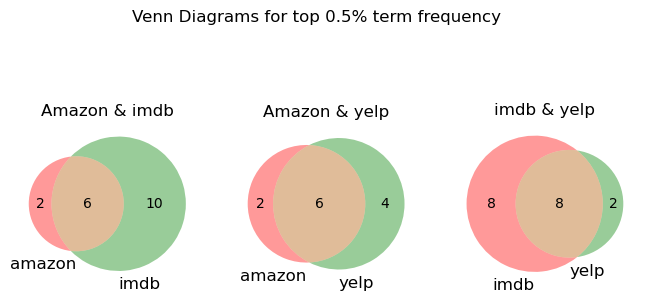

Amazon imdb 交集 :  {'to', 'and', 'this', 'it', 'is', 'the'}
Amazon yelp 交集 :  {'to', 'and', 'this', 'it', 'is', 'the'}
imdb yelp 交集 :  {'to', 'and', 'this', 'of', 'it', 'was', 'is', 'the'}
Amazon imdb yelp 交集 :  {'to', 'and', 'this', 'it', 'is', 'the'}


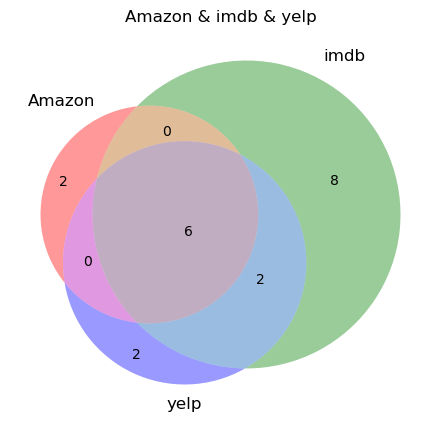

In [ ]:
#繪製文氏圖，查看不同資料集間，詞頻排名前0.5%的詞彙重疊情形。

from matplotlib_venn import venn2,venn3
from matplotlib import pyplot as plt

set_A = set(word)
set_B = set(word_imdb)
set_C = set(word_yelp)
#print(set_A,set_B,set_C)


fig, (ax1, ax2,ax3) = plt.subplots(1,3,figsize=(8, 4))

#plt.figure(figsize=(3,3))
v1 = venn2(subsets=[set_A,set_B],set_labels=('amazon','imdb'),ax=ax1)
ax1.set_title('Amazon & imdb')

#plt.figure(figsize=(3,3))
v2 = venn2(subsets=[set_A,set_C],set_labels=('amazon','yelp'),ax=ax2)
ax2.set_title('Amazon & yelp')

v3 = venn2(subsets=[set_B,set_C],set_labels=('imdb','yelp'),ax=ax3)
ax3.set_title('imdb & yelp')
fig.suptitle('Venn Diagrams for top 0.5% term frequency')
plt.show()


ai = set_A.intersection(set_B)
ay = set_A.intersection(set_C)
iy = set_B.intersection(set_C)

aiy = set_A.intersection(set_B).intersection(set_C)

print('Amazon imdb 交集 : ',ai)
print('Amazon yelp 交集 : ',ay)
print('imdb yelp 交集 : ',iy)
print('Amazon imdb yelp 交集 : ',aiy)


plt.figure(figsize=(8,5))
v4 = venn3(subsets=[set_A, set_B, set_C],
           set_labels=['Amazon', 'imdb', 'yelp'],)
plt.title('Amazon & imdb & yelp')
plt.show()

可推測三個資料集間有相似性，主要都是由句子組成的資料，沒有資料集是僅有單一詞彙組成的。

#### >>> **TF_IDF features**


In [ ]:
all_df = pd.concat([data_amazon,data_imdb,data_yelp],ignore_index=True)
all_df

,sentence,label
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
...,...,...
2740,I think food should have flavor and texture an...,0
2741,Appetite instantly gone.,0
2742,Overall I was not impressed and would not go b...,0
2743,"The whole experience was underwhelming, and I ...",0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
all_df_tfidf = vectorizer.fit_transform(all_df.sentence)
all_df_tfidf_result = pd.DataFrame(all_df_tfidf.toarray(), columns = vectorizer.get_feature_names_out())

all_df_tfidf_result

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### >>> **Naive Bayes classifier ( TF-IDF features )**


In [ ]:
all_df_tfidf_result["label"] = all_df["label"]
all_df_tfidf_result

,00,10,100,11,12,13,15,15g,15pm,17,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
all_df_tfidf_result.isnull().apply(lambda x: dmh.check_missing_values(x)).loc[:,'label']

0    The amoung of missing records is: 
1                                     0
Name: label, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

train_data, test_data = train_test_split(all_df_tfidf_result, random_state=42, train_size=0.8)

X_train, y_train = train_data.iloc[:, :-1], train_data.loc[:, "label"]
X_test, y_test = test_data.iloc[:, :-1], test_data.loc[:, "label"]

model = MultinomialNB()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

correct  = (y_test == y_predict).sum()      
acc = correct / y_test.size
print(f'Accuracy (TF-IDF) : {acc*100:.2f}%')

Accuracy (TF-IDF) : 81.79%


#### >>> **Naive Bayes classifier ( word frequency features )**


In [ ]:
df=pd.concat([data_amazon,data_imdb,data_yelp],axis=0,ignore_index=True)
df

,sentence,label
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0
...,...,...
2740,I think food should have flavor and texture an...,0
2741,Appetite instantly gone.,0
2742,Overall I was not impressed and would not go b...,0
2743,"The whole experience was underwhelming, and I ...",0


In [ ]:
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)

In [ ]:
df_wordFreq_result = pd.DataFrame(df_counts.toarray(), columns = count_vect.get_feature_names_out())
df_wordFreq_result['label']= df['label']
df_wordFreq_result

,00,10,100,11,12,13,15,15g,15pm,17,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2740,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

train_data, test_data = train_test_split(df_wordFreq_result, random_state=42, train_size=0.8)

X_train, y_train = train_data.iloc[:, :-1], train_data.loc[:, "label"]
X_test, y_test = test_data.iloc[:, :-1], test_data.loc[:, "label"]

model = MultinomialNB()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

correct = (y_test == y_predict).sum()      
acc = correct / y_test.size
print(f'Accuracy (Word Frequency) : {acc*100:.2f}%')

Accuracy (Word Frequency) : 82.15%


#### >>> **Comment on the differences**


In this case, the features created by Word Frequency can achieve better accuracy than TF-IDF. Although TF-IDF considers the weights and correlations between words, I think these datasets are related to sentiment (Positive / Negative) ,where the frequency of occurrence of sentiment words in the text may be more important.

## >>> **Fourth Part**


1. 資料平衡 ： 在資料前處理中，通常平衡每個類別的資料量是重要的一環；雖然課堂採用的四個類別資料量差不多，但若要進行預測時，也可以嘗試讓四個類別的資料量一致，尤其假設採用的是資料量差異很大的資料集，此步驟尤為重要。

2. 詞形還原 （Lemmatization）：針對NLP任務，詞形還原可以去除單字的詞綴，如running 還原成run、cars還原成car......；透過這樣的手法，可以讓意義相同，型態卻不同的資料一致，像是 It was good. / It is good. 都還原成 It is good. ， 讓模型達到更精準的結果。

3. 資料去噪：針對課堂的資料集，可以透過除去不相關的資料(如電子郵件、電話號碼)，來降低資料的計算量與不必要的噪聲，可以讓輸入模型的資料更乾淨。

4. 繪製更有意義的圖表：課堂畫的圖是針對詞頻很高的單字，如and, or, I 等相對無意義的詞彙；然而，我們實際上感興趣的是有意義且頻率高的單字，故可以嘗試畫這類的圖來觀察重要的特徵。